In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

In [3]:
from sklearn.cluster import Birch

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

In [5]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn import linear_model

In [6]:
seed = 84
np.random.seed(seed)
original_df = pd.read_csv("EVtripsGTAtraining.csv")
df = original_df.copy(deep=True)

In [7]:
df.head()

,Date,"Average consumption, electric (kWh/100km)",Distance driven (km),Driving time (h),Average speed (km/h)
0,2016-02-04,41.0,3,00:11,18
1,2016-02-04,54.7,2,00:08,21
2,2016-02-05,32.1,68,01:59,35
3,2016-02-06,37.1,30,01:10,26
4,2016-02-07,44.3,13,00:32,24


In [16]:
df.dtypes

Date                                          object
Average consumption, electric (kWh/100km)    float64
Distance driven (km)                           int64
Driving time (h)                              object
Average speed (km/h)                           int64
dtype: object

In [18]:
df.isnull().sum()

Date                                         0
Average consumption, electric (kWh/100km)    0
Distance driven (km)                         0
Driving time (h)                             0
Average speed (km/h)                         0
dtype: int64

In [8]:
df.describe()

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h)
count,469.000000,469.000000,469.000000
mean,31.545842,13.153518,30.729211
std,8.496448,10.746193,10.420293
min,19.300000,1.000000,2.000000
25%,25.500000,8.000000,24.000000
50%,29.300000,9.000000,30.000000
75%,34.900000,14.000000,35.000000
max,91.600000,91.000000,95.000000


In [19]:
df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)

In [51]:
df.dtypes

Date                                         datetime64[ns]
Average consumption, electric (kWh/100km)           float64
Distance driven (km)                                  int64
Driving time (h)                                     object
Average speed (km/h)                                  int64
minutes                                               int32
dtype: object

In [46]:
df['Driving time (h)'].str.split(pat=":", expand=True)[0].astype(int)*1

0      0
1      0
2      1
3      1
4      0
      ..
464    0
465    0
466    0
467    0
468    0
Name: 0, Length: 469, dtype: int32

In [47]:
df['minutes'] = df['Driving time (h)'].str.split(pat=":", expand=True)[0].astype(int)*60+df['Driving time (h)'].str.split(pat=":", expand=True)[1].astype(int)

In [48]:
df

,Date,"Average consumption, electric (kWh/100km)",Distance driven (km),Driving time (h),Average speed (km/h),minutes
0,2016-02-04,41.0,3,00:11,18,11
1,2016-02-04,54.7,2,00:08,21,8
2,2016-02-05,32.1,68,01:59,35,119
3,2016-02-06,37.1,30,01:10,26,70
4,2016-02-07,44.3,13,00:32,24,32
...,...,...,...,...,...,...
464,2017-12-11,35.5,8,00:24,20,24
465,2017-12-11,27.2,10,00:25,24,25
466,2017-12-13,34.7,9,00:17,31,17
467,2017-12-15,32.4,9,00:16,35,16


In [52]:
df['month'] = df['Date'].dt.month

In [53]:
df.head()

,Date,"Average consumption, electric (kWh/100km)",Distance driven (km),Driving time (h),Average speed (km/h),minutes,month
0,2016-02-04,41.0,3,00:11,18,11,2
1,2016-02-04,54.7,2,00:08,21,8,2
2,2016-02-05,32.1,68,01:59,35,119,2
3,2016-02-06,37.1,30,01:10,26,70,2
4,2016-02-07,44.3,13,00:32,24,32,2


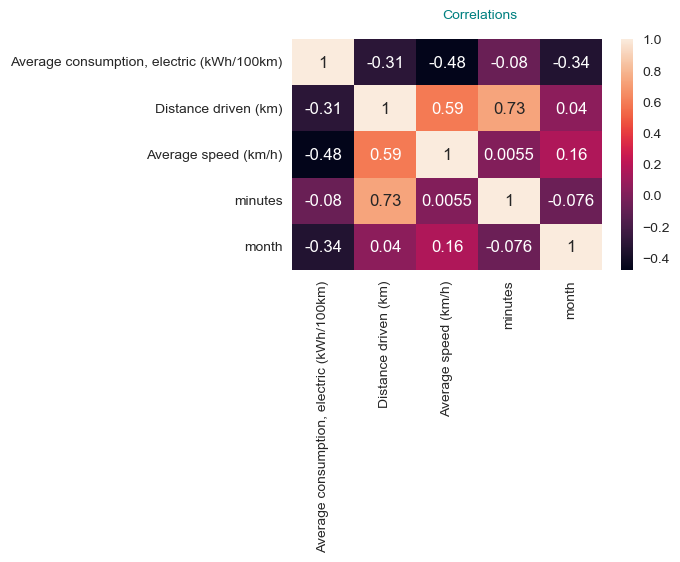

In [54]:
# Correlation heatmap
plt.figure(figsize=(5, 3))
plt.suptitle('Correlations', fontsize = 10, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [56]:
df.drop(columns=['Date', 'Driving time (h)'], inplace=True)

In [57]:
df.head()

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month
0,41.0,3,18,11,2
1,54.7,2,21,8,2
2,32.1,68,35,119,2
3,37.1,30,26,70,2
4,44.3,13,24,32,2


<AxesSubplot:>

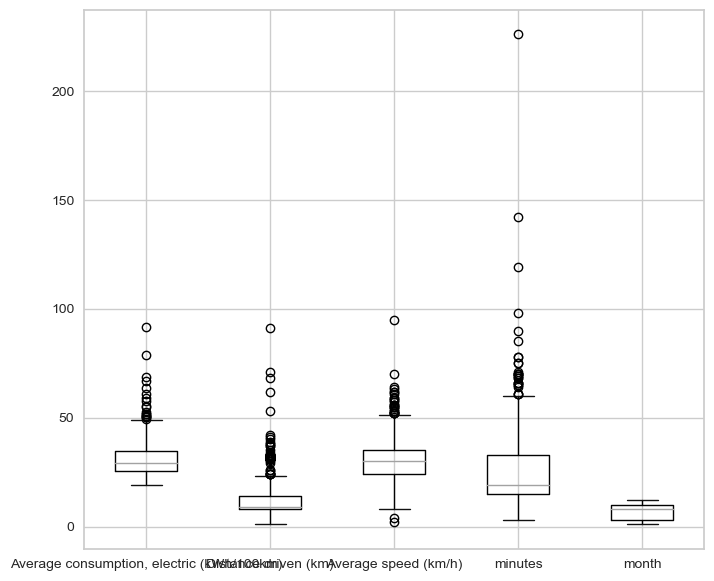

In [59]:
df.boxplot(figsize=(8,7))

In [60]:
df.columns

Index(['Average consumption, electric (kWh/100km)', 'Distance driven (km)',
       'Average speed (km/h)', 'minutes', 'month'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Average consumption, electric (kWh/100km)'}>,
        <AxesSubplot:title={'center':'Distance driven (km)'}>],
       [<AxesSubplot:title={'center':'Average speed (km/h)'}>,
        <AxesSubplot:title={'center':'minutes'}>],
       [<AxesSubplot:title={'center':'month'}>, <AxesSubplot:>]],
      dtype=object)

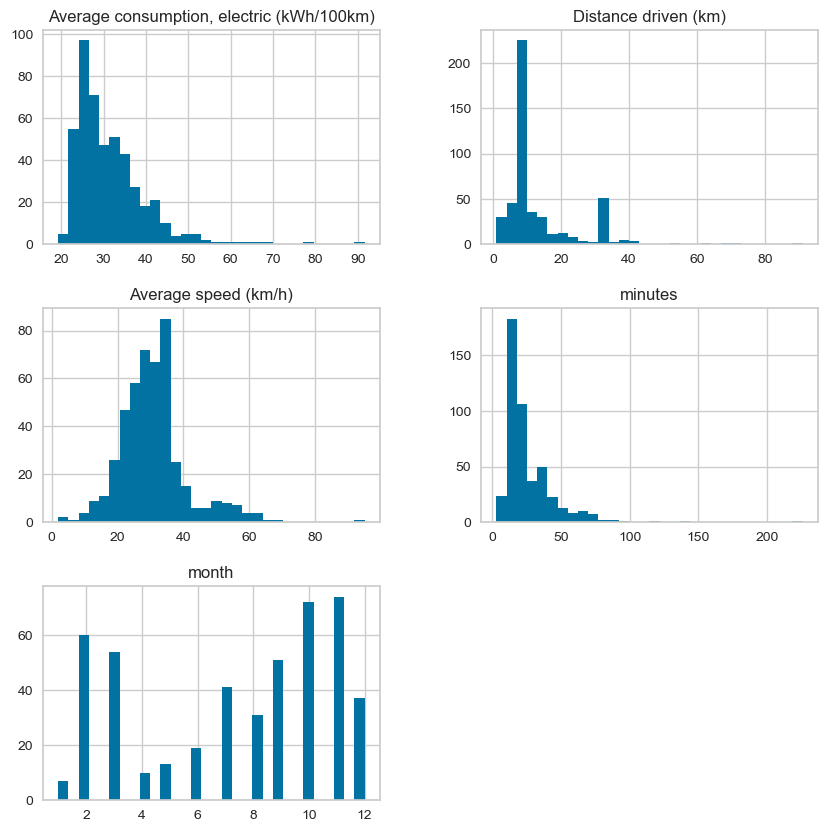

In [61]:
df.hist(bins=30, sharex=False, sharey=False, xlabelsize=10, ylabelsize=10, figsize=(10,10))

In [62]:
df[df['minutes']>100]

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month
2,32.1,68,35,119,2
206,42.1,33,9,226,2
345,21.4,71,30,142,9


In [63]:
df = df.drop(df[df['minutes']>100].index)

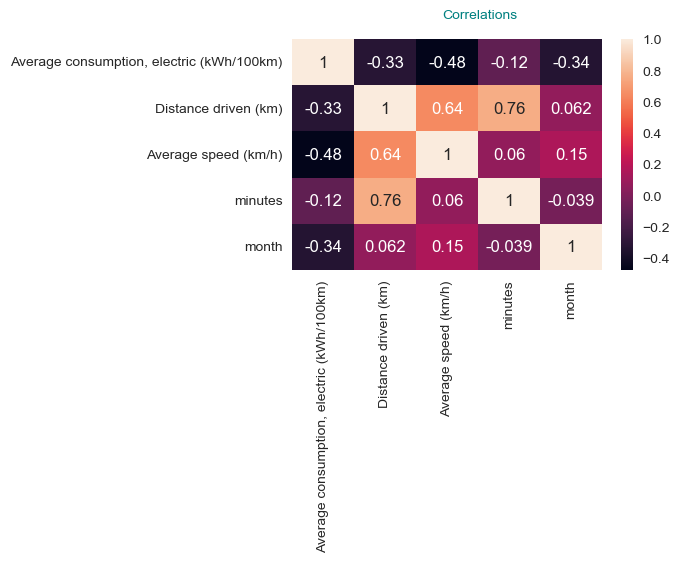

In [64]:
# Correlation heatmap
plt.figure(figsize=(5, 3))
plt.suptitle('Correlations', fontsize = 10, color= 'teal')
corr = df.corr()
sns.heatmap(corr, annot=True)
plt.show()

In [65]:
kmeans_scaler = StandardScaler()
kmeans_scaler.fit(df)
scaled_df = kmeans_scaler.transform(df)

In [82]:
cluster_number = 2

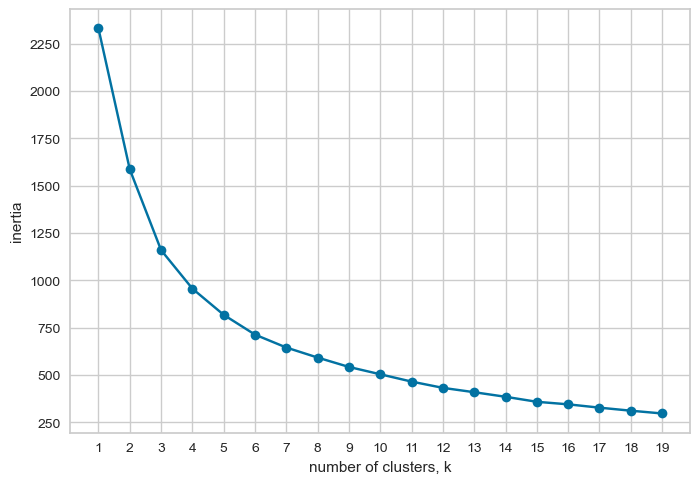

In [66]:
# visualize inertias

ks = range(1,20)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    
    np.random.seed(seed)
    
    model = KMeans(n_clusters = k)
    
    # Fit model to samples
    model.fit(scaled_df)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [83]:
np.random.seed(seed)

model = KMeans(n_clusters = cluster_number)

# Fit model to scaled_df
model.fit_predict(scaled_df)

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [84]:
df['Cluster'] = model.labels_

In [85]:
df

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month,Cluster
0,41.0,3,18,11,2,0
1,54.7,2,21,8,2,0
3,37.1,30,26,70,2,1
4,44.3,13,24,32,2,0
5,34.4,22,35,39,2,1
...,...,...,...,...,...,...
464,35.5,8,20,24,12,0
465,27.2,10,24,25,12,0
466,34.7,9,31,17,12,0
467,32.4,9,35,16,12,0


In [86]:
df[df['Cluster']==0].describe()

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month,Cluster
count,377.000000,377.000000,377.000000,377.000000,377.000000,377.0
mean,32.610080,8.623342,28.129973,19.721485,7.363395,0.0
std,8.908378,3.173408,7.019091,9.684073,3.463800,0.0
min,21.800000,1.000000,2.000000,3.000000,1.000000,0.0
25%,26.100000,7.000000,24.000000,15.000000,3.000000,0.0
50%,30.800000,9.000000,29.000000,17.000000,8.000000,0.0
75%,36.300000,9.000000,33.000000,21.000000,10.000000,0.0
max,91.600000,19.000000,50.000000,78.000000,12.000000,0.0


In [87]:
df[df['Cluster']==1].describe()

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month,Cluster
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.0
mean,27.026966,30.853933,41.943820,47.977528,7.764045,1.0
std,4.110208,9.468309,14.326041,15.799150,3.538819,0.0
min,19.300000,18.000000,17.000000,24.000000,2.000000,1.0
25%,24.300000,26.000000,29.000000,36.000000,3.000000,1.0
50%,26.100000,31.000000,42.000000,46.000000,9.000000,1.0
75%,28.500000,32.000000,52.000000,58.000000,11.000000,1.0
max,43.400000,91.000000,95.000000,98.000000,12.000000,1.0


In [77]:
df[df['Cluster']==2].describe()

,"Average consumption, electric (kWh/100km)",Distance driven (km),Average speed (km/h),minutes,month,Cluster
count,127.000000,127.000000,127.000000,127.000000,127.000000,127.0
mean,39.565354,8.440945,25.850394,21.692913,3.031496,2.0
std,10.058364,4.394538,8.006028,14.085629,1.613126,0.0
min,25.000000,1.000000,2.000000,3.000000,1.000000,2.0
25%,33.400000,6.000000,20.500000,14.000000,2.000000,2.0
50%,37.500000,9.000000,26.000000,17.000000,3.000000,2.0
75%,42.200000,9.500000,33.000000,25.000000,3.000000,2.0
max,91.600000,23.000000,41.000000,78.000000,10.000000,2.0


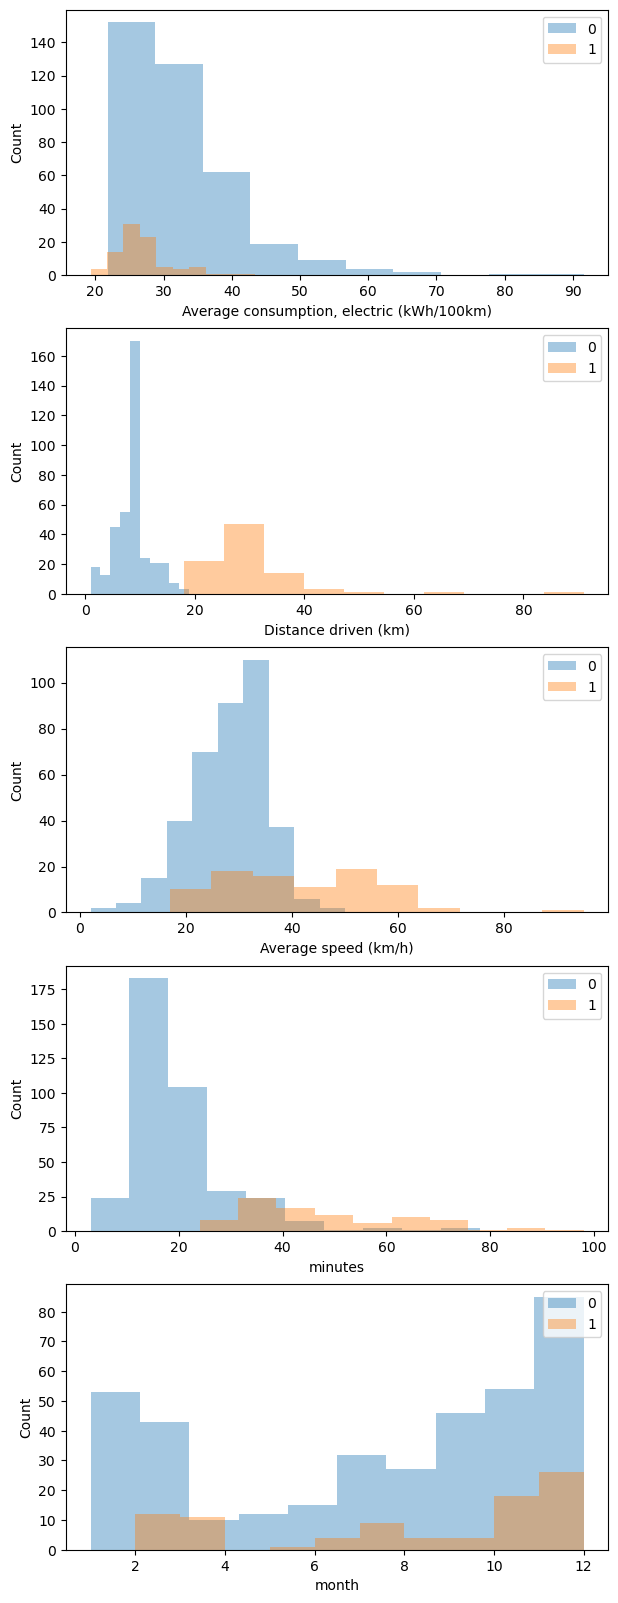

In [88]:
# plot value counts of each numerical column
bins = 10
col_list = list(df.columns)
plt.style.use('default')

fig, axs = plt.subplots(len(col_list)-1, figsize=(7, 20))
# plt.subplots_adjust(hspace=1)
for col in col_list:
    if col != "Cluster":
        for n in range(0,cluster_number):
            axs[col_list.index(col)].hist(df[df['Cluster']==n][col], bins=bins, alpha=0.4, 
                                          label=n, density=False)
        axs[col_list.index(col)].legend(loc="upper right")
        axs[col_list.index(col)].set_xlabel(col)
        axs[col_list.index(col)].set_ylabel('Count')
    
fig.show()

In [96]:
df_knn = df[['month', 'Distance driven (km)', 
             'Average speed (km/h)', 'minutes','Average consumption, electric (kWh/100km)']].copy(deep=True)

In [104]:
df_knn_array = df_knn.to_numpy()
X = df_knn_array[:,:-1]
y = df_knn_array[:,-1]

In [105]:
test_size = 0.3
num_folds = 10
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size)

In [106]:
scaler = StandardScaler().fit(X_train)
rescaled_X_train = scaler.transform(X_train)

In [107]:
knn_scoring = 'neg_mean_absolute_error'
k_values = np.arange(1,20)
knn_param_grid = dict(n_neighbors = k_values, weights = ["distance", "uniform"])

knn_model = KNeighborsRegressor()
knn_grid = GridSearchCV(estimator = knn_model, param_grid = knn_param_grid, scoring = knn_scoring, cv= num_folds)
knn_grid_result = knn_grid.fit(rescaled_X_train, y_train)

print(f"Best: {knn_grid_result.best_score_} {knn_grid_result.best_params_}" )

Best: -3.020076901793158 {'n_neighbors': 15, 'weights': 'distance'}


In [108]:
best_n_neighbour = knn_grid_result.best_params_['n_neighbors']
best_weights = knn_grid_result.best_params_['weights']


knn_trained_model = KNeighborsRegressor(n_neighbors = best_n_neighbour, weights=best_weights)
knn_trained_model.fit(rescaled_X_train,y_train)

KNeighborsRegressor(n_neighbors=15, weights='distance')

In [110]:
rescaled_X_test = scaler.transform(X_test)

y_pred = knn_trained_model.predict(rescaled_X_test)
mean_absolute_error(y_test, y_pred)

4.293081196189305